In [ ]:
import os
import importlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import start_utils
from start_utils import build_pokedex,create_features, read_train_data, read_test_data, simple_train, build_pipe, train_regularization, greedy_feature_selection_dynamicC, random_bucket_feature_search_robust, predict_and_submit
importlib.reload(start_utils)


#1 read and prepare
COMPETITION_NAME = 'fds-pokemon-battles-prediction-2025'
DATA_PATH = os.path.join('input', COMPETITION_NAME)

train_file_path = os.path.join(DATA_PATH, 'train.jsonl')
test_file_path = os.path.join(DATA_PATH, 'test.jsonl')

train_data = read_train_data(train_file_path)
test_data = read_test_data(test_file_path)

# --- 2. COSTRUZIONE POKEDEX  ---
# Combiniamo i dati per trovare tutti i Pokémon
all_data = train_data + test_data
# CHIAMIAMO LA FUNZIONE per creare il dizionario
POKEDEX = build_pokedex(all_data)

#2 create features
# Create feature DataFrames for both training and test sets
print("Processing training data...")
train_df = create_features(train_data,POKEDEX)

print("\nProcessing test data...")
test_df = create_features(test_data,POKEDEX,is_test=True)
    
print("\nTraining features preview:")
#display(train_df.head())
train_df.head().to_json("train_df_head.json", orient="records", indent=2)
#train_df.describe()





Costruzione del Pokédex dai dati di battaglia...
Pokédex costruito! Trovati 20 Pokémon unici.
Processing training data...


Extracting features:   0%|          | 0/10000 [00:00<?, ?it/s]


Processing test data...


Extracting features:   0%|          | 0/5000 [00:00<?, ?it/s]


Training features preview:


In [2]:
display(train_df.head())
display(train_df.describe())

,p1_major_status_infliction_rate,p1_cumulative_major_status_turns_pct,p2_major_status_infliction_rate,p2_cumulative_major_status_turns_pct,p1_max_offense_boost_diff,p1_team_super_effective_moves,expected_damage_ratio_turn_1,p1_max_offensive_stat,p1_max_speed_stat,p1_mean_hp,...,p2_type_advantage,diff_type_advantage,p1_avg_speed_stat_battaglia,p1_avg_high_speed_stat_battaglia,net_major_status_infliction,net_major_status_suffering,p1_max_speed_offense_product,p1_final_hp_per_ko,battle_id,player_won
0,0.750000,0.033333,0.0,0.400000,1,0.0,4.564348,135,120,115.833333,...,0.841667,0.000000,0.500000,0.500000,0.750000,0.366667,16200,1.936407,0,1
1,0.000000,0.066667,0.5,0.100000,1,0.0,0.000000,125,110,123.333333,...,0.858333,0.041667,0.333333,0.166667,-0.500000,0.033333,13750,0.395000,1,1
2,0.333333,0.200000,0.0,0.333333,2,0.0,0.000000,130,110,124.166667,...,0.650000,-0.150000,0.333333,0.333333,0.333333,0.133333,14300,2.090000,2,1
3,0.000000,0.000000,0.0,0.166667,0,0.0,-5.121978,130,110,121.666667,...,0.895833,0.054167,0.500000,0.333333,0.000000,0.166667,14300,0.510000,3,1
4,1.000000,0.033333,1.0,0.033333,0,0.0,-4.035951,135,120,114.166667,...,0.875000,-0.083333,0.333333,0.333333,0.000000,0.000000,16200,1.880000,4,1


,p1_major_status_infliction_rate,p1_cumulative_major_status_turns_pct,p2_major_status_infliction_rate,p2_cumulative_major_status_turns_pct,p1_max_offense_boost_diff,p1_team_super_effective_moves,expected_damage_ratio_turn_1,p1_max_offensive_stat,p1_max_speed_stat,p1_mean_hp,...,p2_type_advantage,diff_type_advantage,p1_avg_speed_stat_battaglia,p1_avg_high_speed_stat_battaglia,net_major_status_infliction,net_major_status_suffering,p1_max_speed_offense_product,p1_final_hp_per_ko,battle_id,player_won
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.289000,0.099207,0.291220,0.100657,0.759200,0.0,0.054019,130.954000,117.542000,113.124317,...,0.948853,0.000998,0.453200,0.367550,-0.002221,0.001450,15401.403000,1.297372,4999.50000,0.500000
std,0.398774,0.100526,0.400098,0.104371,1.224159,0.0,2.298706,5.070942,5.698814,13.405444,...,0.092782,0.100865,0.120877,0.123154,0.578014,0.166475,1083.388095,1.351293,2886.89568,0.500025
min,0.000000,0.000000,0.000000,0.000000,-2.000000,0.0,-8.006701,105.000000,70.000000,63.333333,...,0.166667,-0.600000,0.000000,0.000000,-1.000000,-0.800000,8750.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,130.000000,115.000000,109.166667,...,0.900000,-0.050000,0.333333,0.333333,-0.333333,-0.100000,14375.000000,0.400000,2499.75000,0.000000
50%,0.000000,0.066667,0.000000,0.066667,0.000000,0.0,0.000000,130.000000,120.000000,116.666667,...,0.950000,0.000000,0.500000,0.333333,0.000000,0.000000,16200.000000,0.833333,4999.50000,0.500000
75%,0.500000,0.166667,0.500000,0.166667,1.000000,0.0,0.000000,135.000000,120.000000,121.666667,...,1.000000,0.054167,0.500000,0.500000,0.333333,0.100000,16200.000000,1.745000,7499.25000,1.000000
max,1.000000,0.800000,1.000000,0.800000,8.000000,0.0,7.534228,135.000000,130.000000,135.833333,...,1.620833,0.541667,1.000000,0.833333,1.000000,0.800000,17550.000000,6.000000,9999.00000,1.000000


(83, 83)


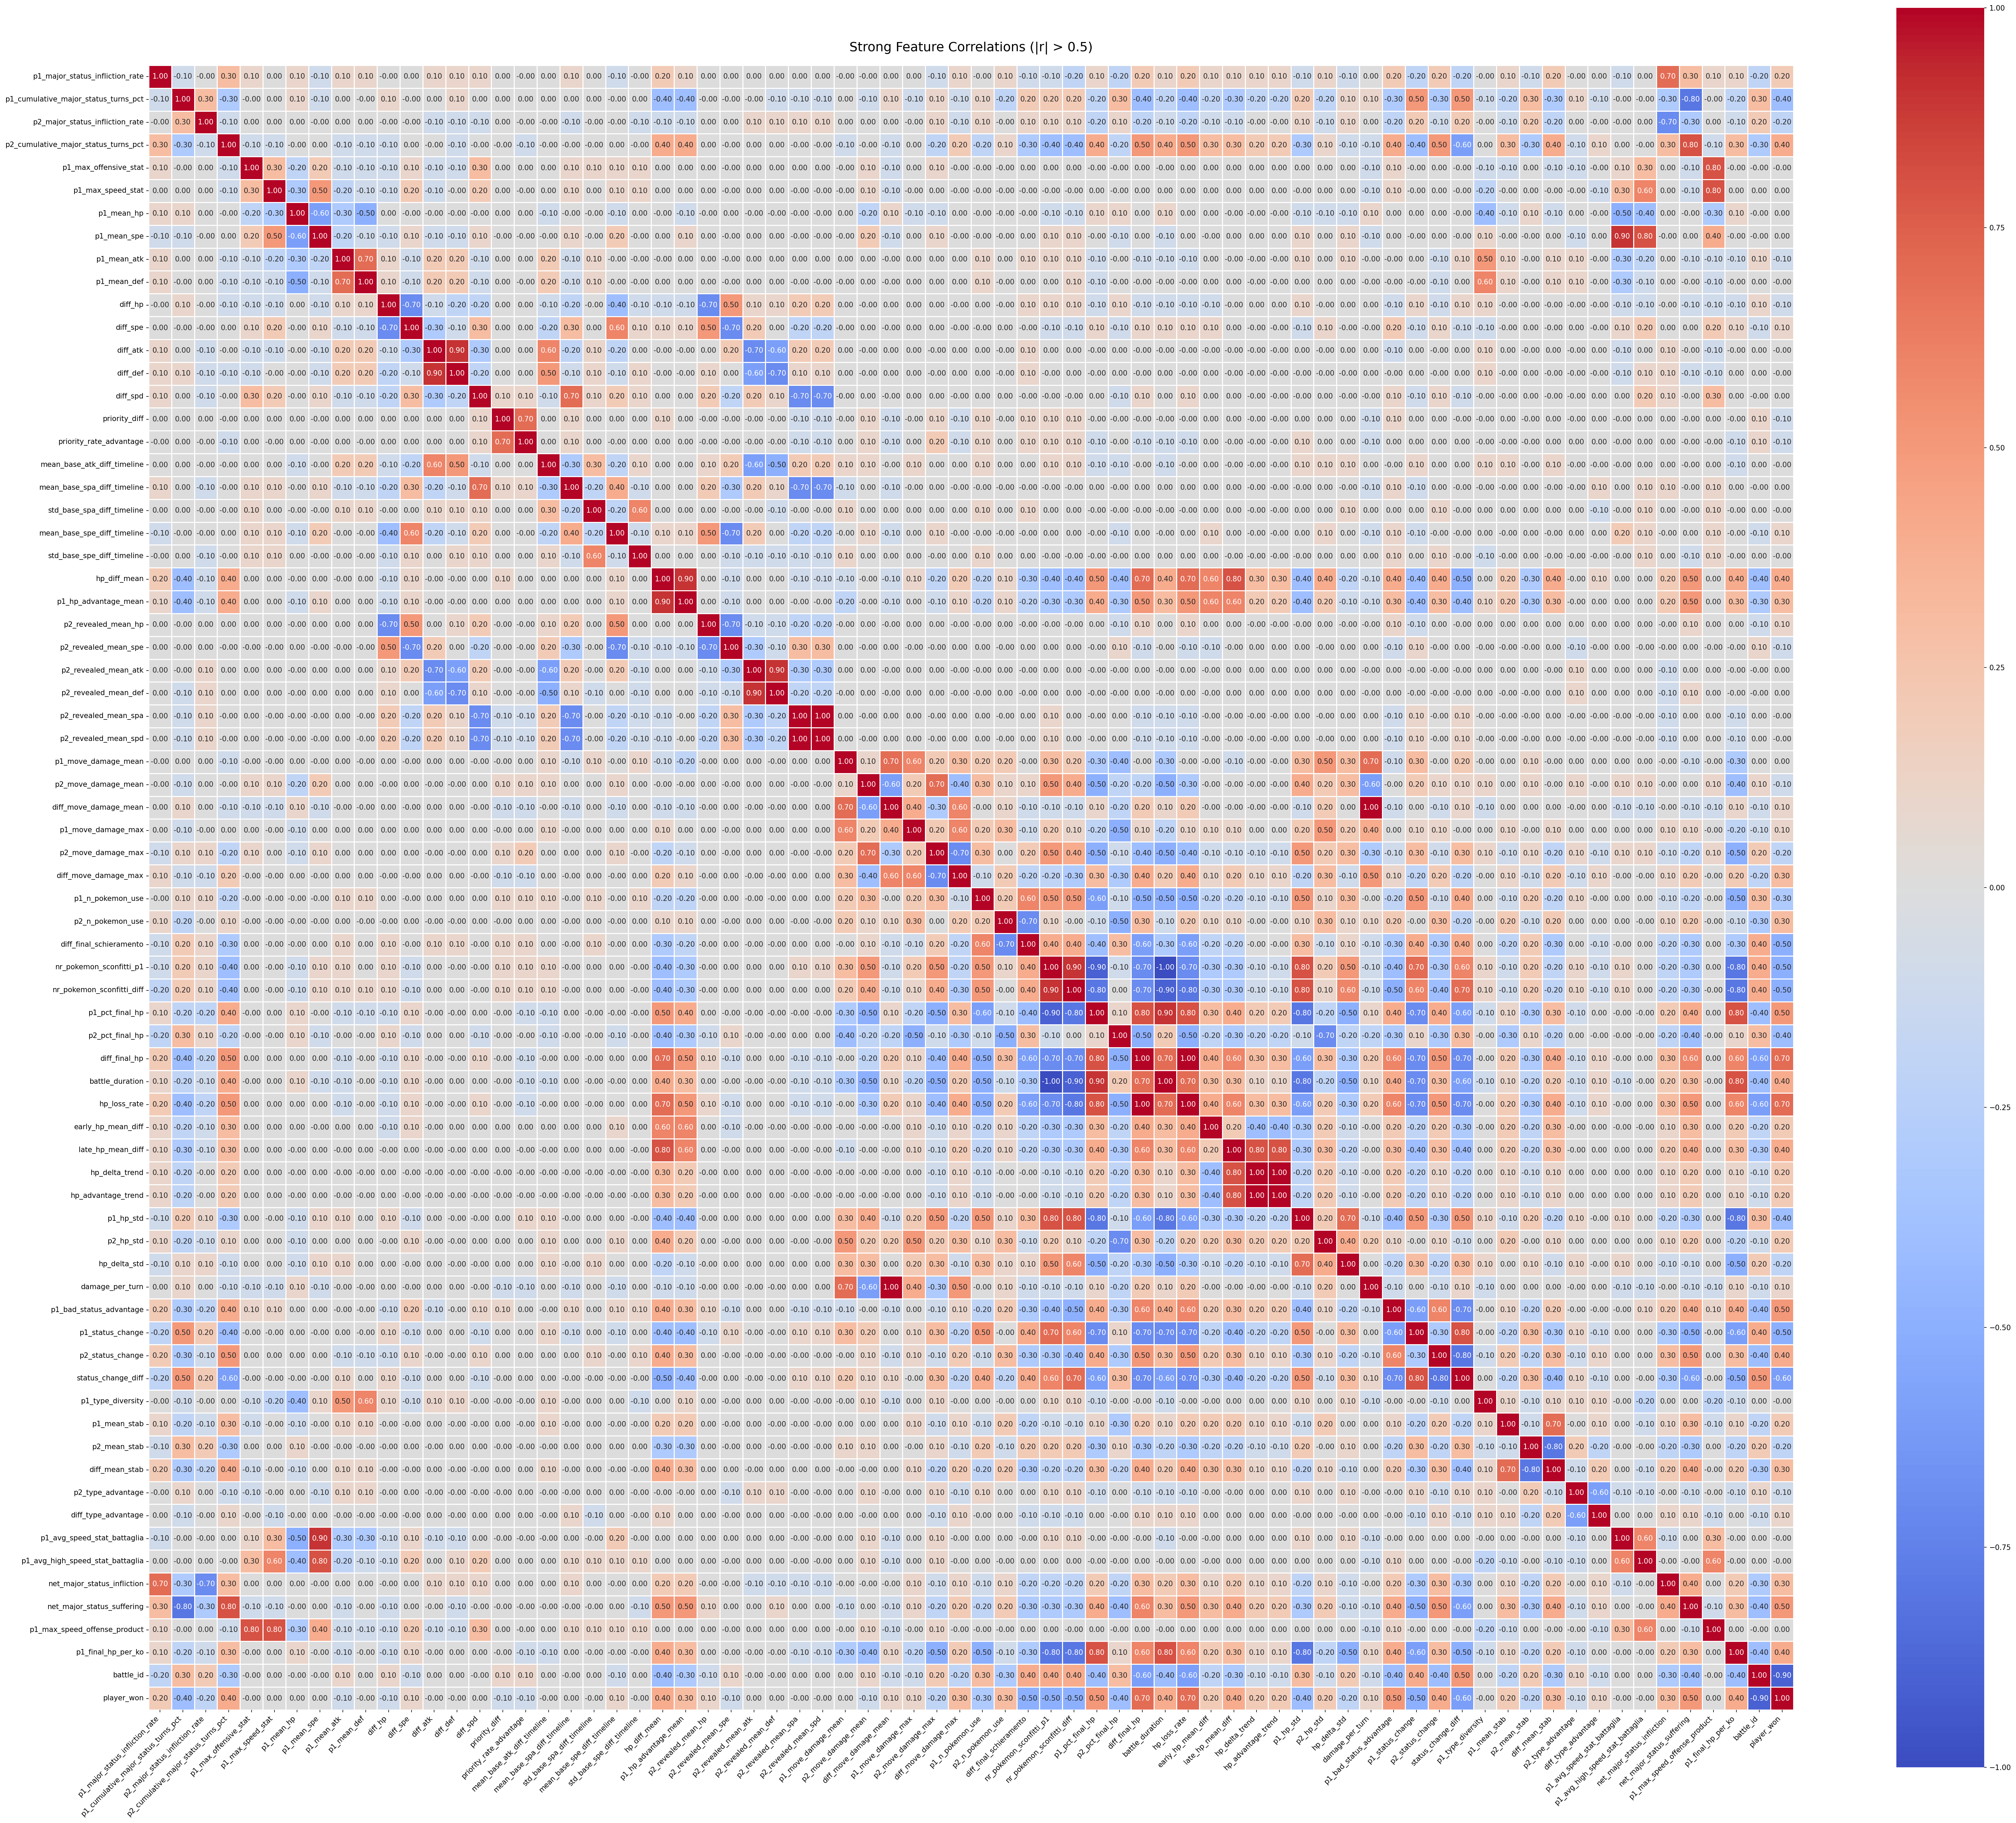

In [3]:

corr_matrix = train_df.corr(numeric_only=True).round(1)
print(corr_matrix.shape)
pd.set_option('display.max_columns', None)   # mostra tutte le colonne
pd.set_option('display.max_rows', None)      # mostra tutte le righe
pd.set_option('display.width', 0)            # evita line wrapping
pd.set_option('display.max_colwidth', None)  # mostra nomi completi delle colonne


#attenzione mostra solo colonne tanto correlate nel dataset
# 1️⃣ Compute correlation matrix and filter strong correlations
mask_strong = (corr_matrix.abs() > 0.5) & (corr_matrix.abs() < 1.0)
strong_features = corr_matrix.columns[mask_strong.any()].tolist()
subset_corr = corr_matrix.loc[strong_features, strong_features]

# 2️⃣ Dynamically adjust figure size based on number of features
n = len(subset_corr.columns)
fig_width = max(12, n * 0.6)
fig_height = max(10, n * 0.6)

# 3️⃣ Plot with larger figure, higher DPI, and better layout
plt.figure(figsize=(fig_width, fig_height), dpi=150)
sns.heatmap(
    subset_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,        # small grid lines for separation
    cbar_kws={'shrink': 0.8}
)

plt.title("Strong Feature Correlations (|r| > 0.5)", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [4]:
# Define features and target
#features = ['p1_type_diversity', 'p1_type_resistance', 'p1_type_weakness']
#features = ['diff_mean_stab']
features = [col for col in train_df.columns if col not in ['battle_id', 'player_won']]
print(f"Using {len(features)} features")
X = train_df[features]
y = train_df['player_won']

#3. TRAIN
#pipe = 
# simple_train(X,y)

# ###GREEDY
# pipe = build_pipe()
# selected, history = greedy_feature_selection(X, y, pipe, cv=5, min_delta=0.0005)

# print("\n✅ Selected features:")
# print(selected)
# print("\n📈 Accuracy progression:")
# print(history)

# # Run random bucket search
# """
# n_buckets 100
# bucket_size 25
# Best bucket found:
# Score: 0.8396 with 22 features
# Top features: ['p1_hp_std', 'mean_base_spa_diff_timeline', 'hp_delta_trend', 'hp_delta_std', 'p1_mean_def', 'diff_hp', 'mean_base_atk_diff_timeline', 'p2_pct_final_hp', 'p1_mean_spe', 'p1_mean_atk', 'diff_final_schieramento', 'p1_mean_hp', 'p1_hp_advantage_mean', 'p1_type_resistance', 'nr_pokemon_sconfitti_p1', 'hp_advantage_trend', 'p1_mean_sp', 'status_change_diff', 'p1_n_pokemon_use', 'p1_bad_status_advantage', 'p1_pct_final_hp', 'hp_loss_rate']
# """
# pipe = build_pipe()
# bucket_size = 25
# res = random_bucket_feature_search(X, y, pipe, n_buckets=100, bucket_size=bucket_size, try_subsets=True)

# print("\nBest score:", res["best_score"])
# print("Selected features:", res["best_features"])

# pipe = build_pipe()
# bucket_size = 35
# res = random_bucket_feature_search(X, y, pipe, n_buckets=200, bucket_size=bucket_size, try_subsets=True)

# print("\nBest score:", res["best_score"])
# print("Selected features:", res["best_features"])

# ###
# pipe = build_pipe()
# bucket_size = len(features)#25
# res = random_bucket_feature_search(X, y, pipe, n_buckets=300, bucket_size=bucket_size, try_subsets=True)

# print("\nBest score:", res["best_score"])
# print("Selected features:", res["best_features"])
# #pipe = train_regularization(X,y)
# #4 SUBMIT
# exit()

#finally 
"""
39/49 features: train (shuffle seed 42) 84.44% (+/- 0.43%), train(shuffle seed 1234)84.51% (+/- 1.04%); test: 83.46 
49/49 features: train (shuffle seed 42) 84.25% (+/- 0.33%), train(shuffle seed 1234)84.30% (+/- 1.17%); test: 83.26
""" 
selected = features#['p1_max_offensive_stat', 'p1_mean_sp', 'p1_cumulative_major_status_turns_pct', 'diff_def', 'mean_base_atk_diff_timeline', 'p1_n_pokemon_use', 'p1_hp_std', 'diff_atk', 'p2_cumulative_major_status_turns_pct', 'p1_bad_status_advantage', 'battle_duration', 'p1_mean_def', 'p1_avg_speed_stat_battaglia', 'mean_base_spa_diff_timeline', 'late_hp_mean_diff', 'nr_pokemon_sconfitti_p1', 'p1_type_weakness', 'p1_avg_high_speed_stat_battaglia', 'p1_pct_final_hp', 'p1_hp_advantage_mean', 'std_base_spa_diff_timeline', 'hp_diff_mean', 'std_base_spe_diff_timeline', 'diff_hp', 'p2_n_pokemon_use', 'p1_mean_atk', 'p2_hp_std', 'p2_major_status_infliction_rate', 'mean_base_spe_diff_timeline', 'hp_advantage_trend', 'p1_type_resistance', 'nr_pokemon_sconfitti_p2', 'priority_diff', 'diff_final_schieramento', 'p1_type_diversity', 'p1_mean_spe', 'p1_major_status_infliction_rate', 'expected_damage_ratio_turn_1', 'hp_loss_rate']
#now that I know which features are best I fit my model to these and submit
X_selected = X[selected]
final_pipe = train_regularization(X_selected,y)
#final_pipe = simple_train(X_selected,y)#creates and fits pipe
predict_and_submit(test_df, selected, final_pipe)

Using 81 features
build pipe
pipe built
Best params: {'logreg__C': 10, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Best CV mean: 0.8422 ± 0.0058
Generating predictions on the test set...

'submission.csv' file created successfully!
